<a href="https://colab.research.google.com/github/Mostaq27/Data_processing_And_Plotting/blob/main/Fifa_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Imports + read CSV

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# The uploaded file name (change if different)
df = pd.read_csv('fifa.csv')

print(f"Loaded {df.shape[0]:,} rows × {df.shape[1]} columns")
df.head()

Loaded 286 rows × 7 columns


,Date,ARG,BRA,ESP,FRA,GER,ITA
0,1993-08-08,5.0,8.0,13.0,12.0,1.0,2.0
1,1993-09-23,12.0,1.0,14.0,7.0,5.0,2.0
2,1993-10-22,9.0,1.0,7.0,14.0,4.0,3.0
3,1993-11-19,9.0,4.0,7.0,15.0,3.0,1.0
4,1993-12-23,8.0,3.0,5.0,15.0,1.0,2.0


In [2]:
# 2. Clean & parse dates

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')

# Drop rows with invalid dates (if any)
df.dropna(subset=['Date'], inplace=True)

# Set Date as index
df.set_index('Date', inplace=True)

# Ensure ranking columns are numeric
country_cols = ['ARG', 'BRA', 'ESP', 'FRA', 'GER', 'ITA']
for col in country_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop any rows with NaN rankings (if any)
df.dropna(subset=country_cols, inplace=True)

# Add Year for aggregates
df['Year'] = df.index.year

print("Date range:", df.index.min().date(), "→", df.index.max().date())
print("Countries:", country_cols)
df.head()

Date range: 1993-08-08 → 2018-06-07
Countries: ['ARG', 'BRA', 'ESP', 'FRA', 'GER', 'ITA']


,ARG,BRA,ESP,FRA,GER,ITA,Year
Date,,,,,,,
1993-08-08,5.0,8.0,13.0,12.0,1.0,2.0,1993
1993-09-23,12.0,1.0,14.0,7.0,5.0,2.0,1993
1993-10-22,9.0,1.0,7.0,14.0,4.0,3.0,1993
1993-11-19,9.0,4.0,7.0,15.0,3.0,1.0,1993
1993-12-23,8.0,3.0,5.0,15.0,1.0,2.0,1993


In [3]:
# 3. Summary stats

df.describe().round(2)

,ARG,BRA,ESP,FRA,GER,ITA,Year
count,286.00,286.00,286.00,286.00,286.00,286.00,286.00
mean,5.45,3.17,5.32,8.96,5.10,8.35,2005.87
std,4.01,3.62,3.91,6.82,4.35,4.51,7.14
min,1.00,1.00,1.00,1.00,1.00,1.00,1993.00
25%,3.00,1.00,2.00,3.00,2.00,4.00,2000.00
50%,5.00,1.50,5.00,7.00,4.00,8.00,2006.00
75%,7.00,4.00,8.00,15.00,5.00,12.00,2012.00
max,24.00,22.00,25.00,27.00,22.00,20.00,2018.00


In [4]:
# 4. Yearly aggregates (e.g., mean ranking per country)

# Reshape to long format for easier grouping
df_long = df.melt(id_vars=['Year'], value_vars=country_cols, var_name='Country', value_name='Ranking')

# Yearly mean ranking per country (lower is better)
yearly_mean = df_long.groupby(['Year', 'Country'])['Ranking'].mean().reset_index()

# Count of #1 rankings per country
num1_rankings = df_long[df_long['Ranking'] == 1].groupby('Country')['Ranking'].count().reset_index(name='Num_Top1')

yearly_mean.head()

,Year,Country,Ranking
0,1993,ARG,8.6
1,1993,BRA,3.4
2,1993,ESP,9.2
3,1993,FRA,12.6
4,1993,GER,2.8


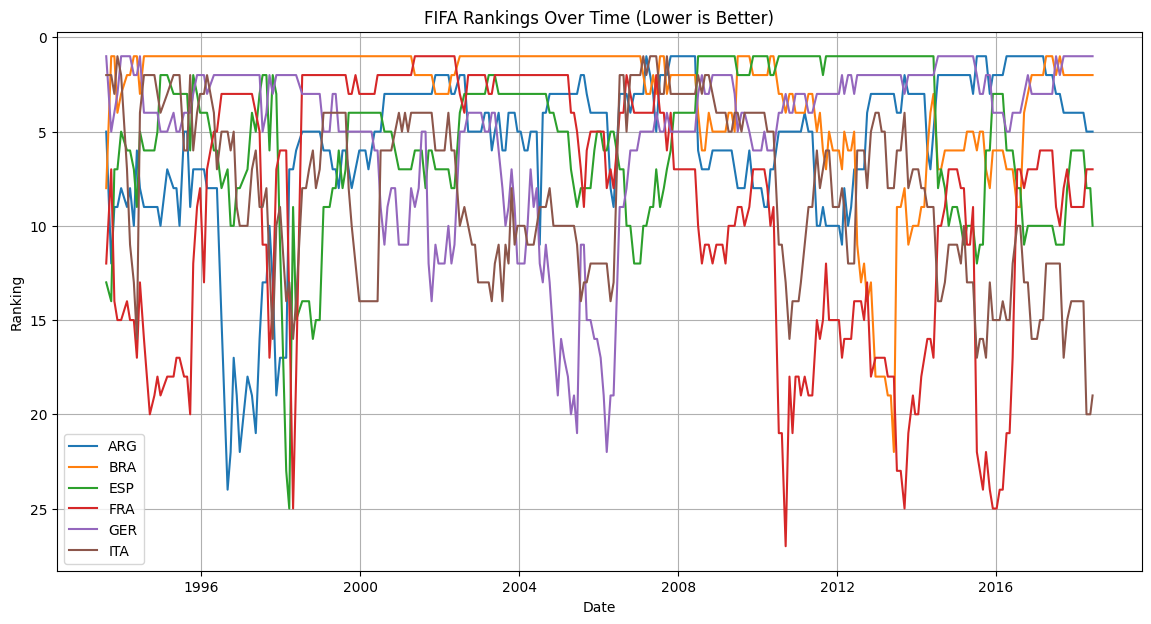

In [5]:
# 5. Plot - Ranking Over Time (Line plot for all countries)

plt.figure(figsize=(14,7))
for country in country_cols:
    plt.plot(df.index, df[country], label=country)
plt.title('FIFA Rankings Over Time (Lower is Better)')
plt.xlabel('Date')
plt.ylabel('Ranking')
plt.legend()
plt.grid(True)
plt.gca().invert_yaxis()  # Invert y-axis so 1 is at top
plt.show()

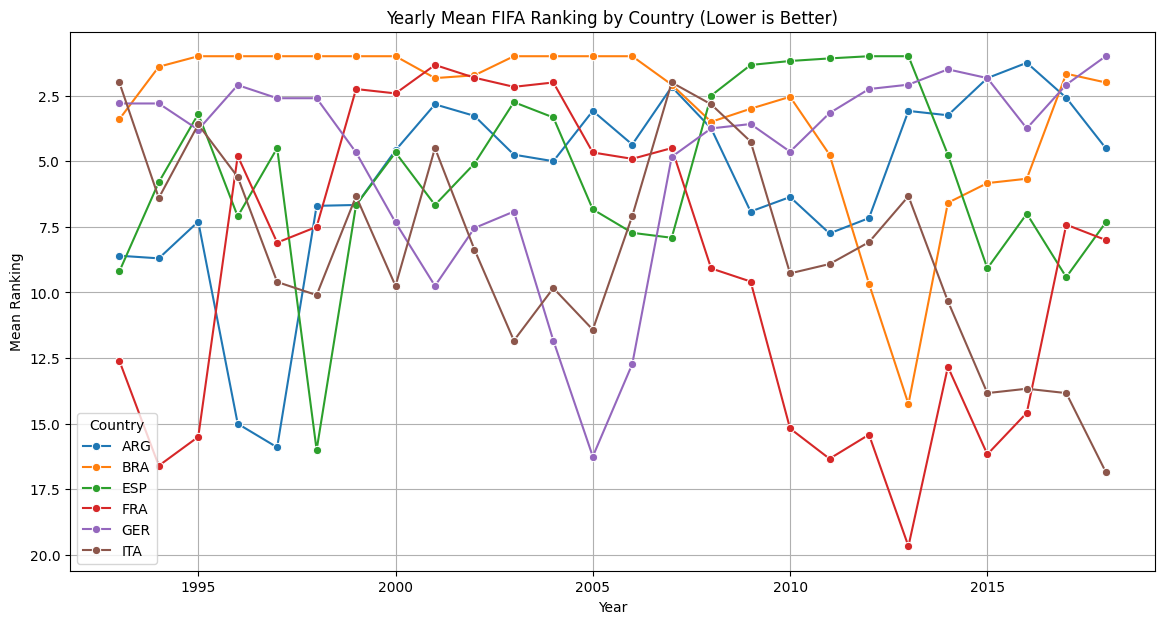

In [6]:
# 6. Plot - Yearly Mean Ranking (Line plot)

plt.figure(figsize=(14,7))
sns.lineplot(data=yearly_mean, x='Year', y='Ranking', hue='Country', marker='o')
plt.title('Yearly Mean FIFA Ranking by Country (Lower is Better)')
plt.xlabel('Year')
plt.ylabel('Mean Ranking')
plt.grid(True)
plt.gca().invert_yaxis()  # Invert y-axis
plt.show()

/tmp/ipython-input-3323574335.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_long, x='Country', y='Ranking', palette='Set3')


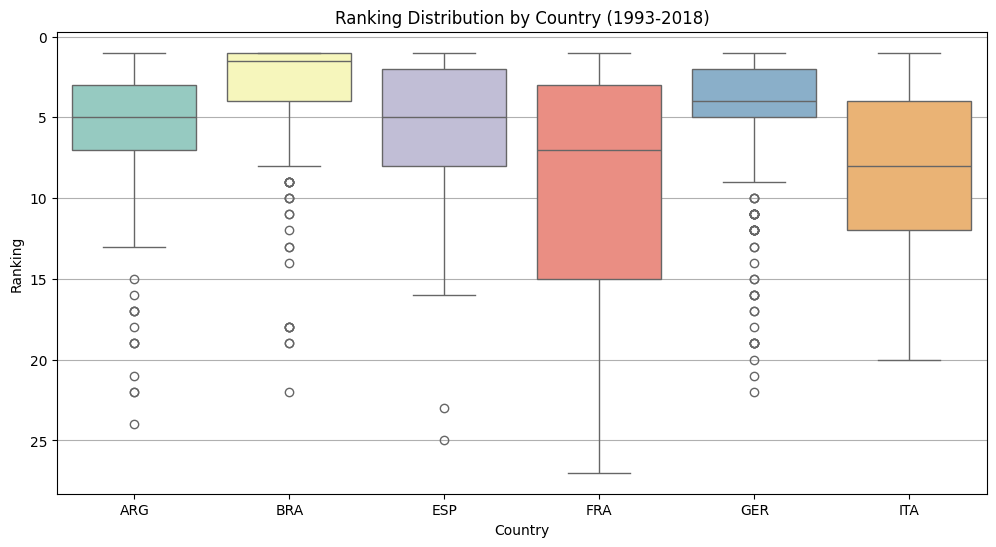

In [7]:
# 7. Plot - Boxplot: Ranking Distribution by Country

plt.figure(figsize=(12,6))
sns.boxplot(data=df_long, x='Country', y='Ranking', palette='Set3')
plt.title('Ranking Distribution by Country (1993-2018)')
plt.xlabel('Country')
plt.ylabel('Ranking')
plt.grid(axis='y')
plt.gca().invert_yaxis()  # Invert y-axis
plt.show()

/tmp/ipython-input-142572269.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=num1_rankings, x='Country', y='Num_Top1', palette='viridis')


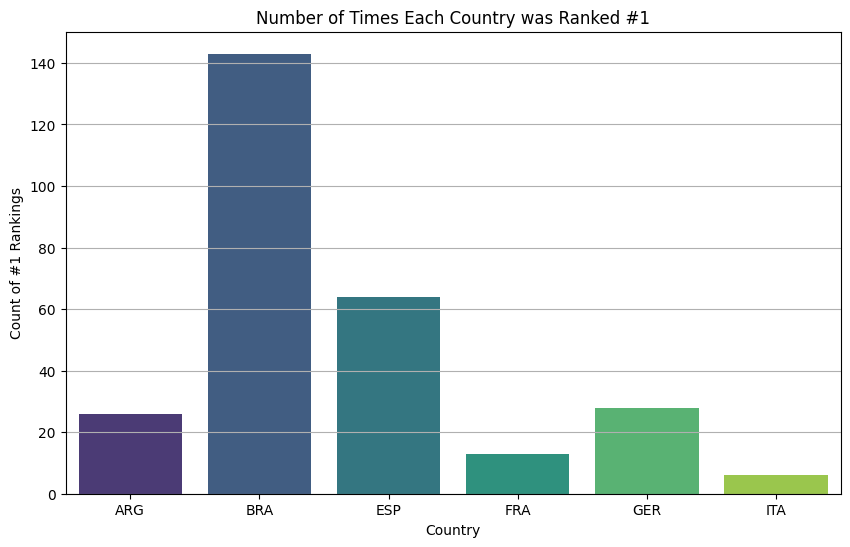

In [8]:
# 8. Plot - Bar: Number of Times Ranked #1

plt.figure(figsize=(10,6))
sns.barplot(data=num1_rankings, x='Country', y='Num_Top1', palette='viridis')
plt.title('Number of Times Each Country was Ranked #1')
plt.xlabel('Country')
plt.ylabel('Count of #1 Rankings')
plt.grid(axis='y')
plt.show()

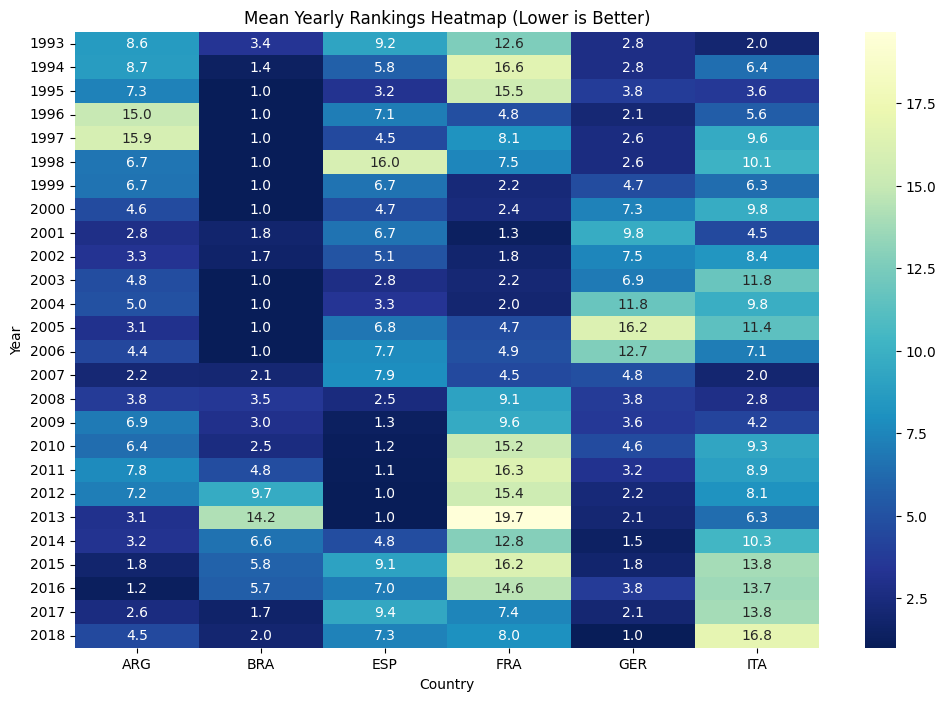

In [9]:
# 9. Heatmap: Rankings by Year and Country

# Pivot for heatmap
yearly_pivot = yearly_mean.pivot(index='Year', columns='Country', values='Ranking')

plt.figure(figsize=(12,8))
sns.heatmap(yearly_pivot, cmap='YlGnBu_r', annot=True, fmt='.1f')  # _r for reverse cmap (lower rank darker)
plt.title('Mean Yearly Rankings Heatmap (Lower is Better)')
plt.ylabel('Year')
plt.xlabel('Country')
plt.show()

In [11]:
# 11. (Optional) Save Processed Data
from google.colab import files

df.to_csv('fifa_cleaned.csv')
files.download('fifa_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>